In [1]:
!wandb login
import wandb
api = wandb.Api()
# run = api.run("/seapat/thesis/runs/x6lfkuoz")

wandb: Currently logged in as: seapat. Use `wandb login --relogin` to force relogin


In [2]:
successful_runs = []
for run in api.runs("thesis"):
    if str(run.state) == "finished":
        successful_runs.append(run)


In [15]:
for run in successful_runs:
    if "8kspni9g" in run.id:
        print(run)
        break

<Run seapat/thesis/8kspni9g (finished)>


In [19]:
import pandas as pd

df = pd.DataFrame(run.scan_history())  # .tail(20)
df


performance/concordance_index_train
0.455621    1
0.563567    1
0.601617    1
0.660787    1
0.649554    1
           ..
0.478875    1
0.466734    1
0.481652    1
0.468080    1
0.709263    1
Name: count, Length: 300, dtype: int64

In [20]:
run.name

'cat'

## Concordance Indices

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the data with a moving average
window_size = 30
# train_loss_smooth = np.convolve(train_loss, np.ones(window_size)/window_size, mode='valid')
# val_loss_smooth = np.convolve(val_loss, np.ones(window_size)/window_size, mode='valid')


def ci_plot_ema(train_ci, val_ci, window_size=30):
    val_ci_smooth = val_ci.ewm(span=window_size).mean()
    train_ci_smooth = train_ci.ewm(span=window_size).mean()

    # Plot the curves with different thickness
    plt.plot(train_ci_smooth, linewidth=2, label="Training CI")
    plt.plot(val_ci_smooth, linewidth=2, label="Validation CI")


    # Add legend and axis labels
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Concordance Index (CI)")
    plt.xlim(0, max(len(val_ci_smooth), len(train_ci_smooth)))
    plt.ylim(0, 1.0)
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.savefig(fname=f"../assets/ci_plots/{run.name}.png", dpi=300)

    plt.show()


In [21]:
fusion_runsa = ["8kspni9g", "d0y1fx4w", "ssw6n015", "5mbi7xrt", "tm7ncpip", "0vkxjq9h", "x4hier58"]
fusion_runsb = []
for run in successful_runs:
    if run.id in fusion_runsa:
        fusion_runsb.append(run)

In [22]:
fusion_runsb

[<Run seapat/thesis/0vkxjq9h (finished)>,
 <Run seapat/thesis/8kspni9g (finished)>,
 <Run seapat/thesis/d0y1fx4w (finished)>,
 <Run seapat/thesis/ssw6n015 (finished)>,
 <Run seapat/thesis/5mbi7xrt (finished)>,
 <Run seapat/thesis/tm7ncpip (finished)>]

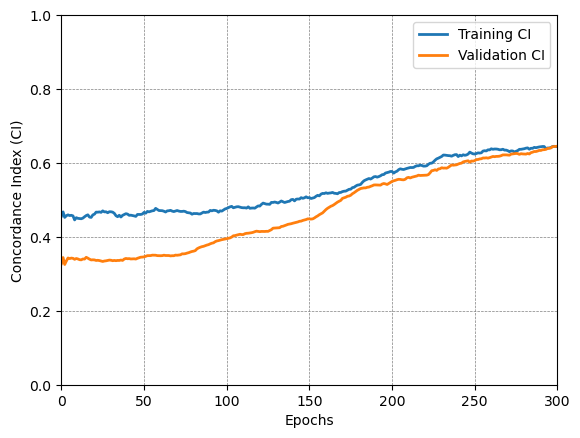

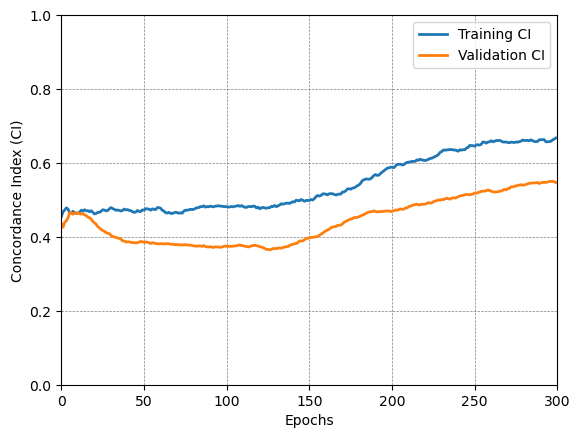

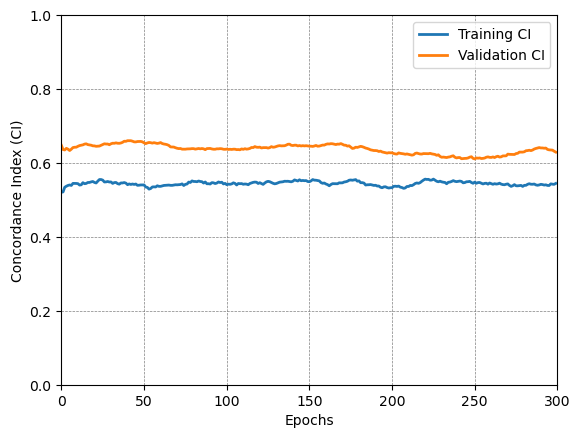

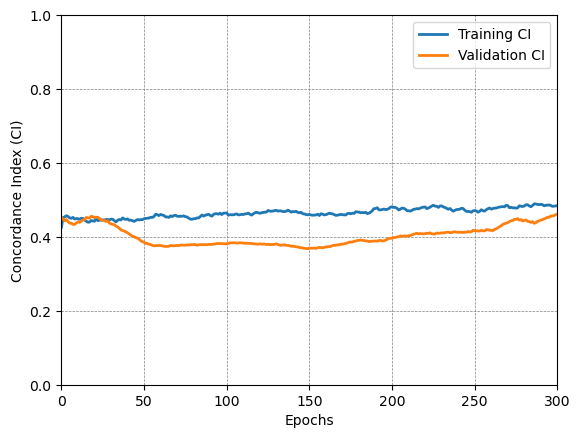

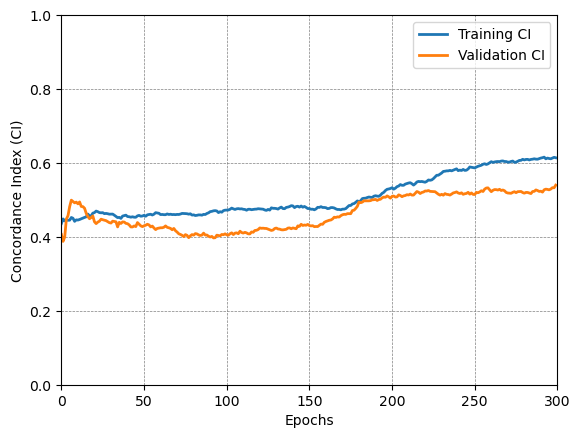

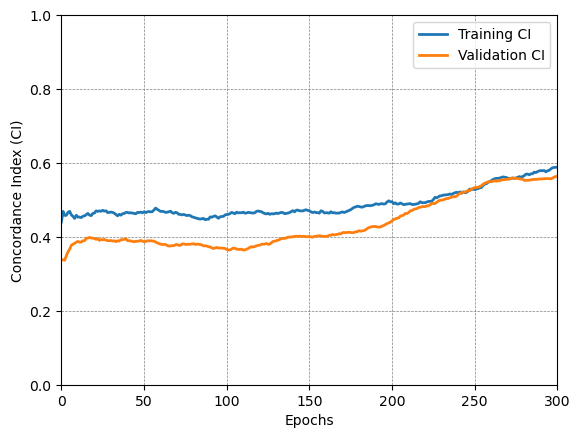

In [23]:
for run in fusion_runsb:
    df = pd.DataFrame(run.scan_history())
    if (
        "performance/concordance_index_val"
        and "performance/concordance_index_train" in df.columns
    ):
        val_ci = (
            df.loc[:, "performance/concordance_index_val"]
            .dropna()
            .reset_index(drop=True)
        )
        train_ci = (
            df.loc[:, "performance/concordance_index_train"]
            .dropna()
            .reset_index(drop=True)
        )
        ci_plot_ema(train_ci, val_ci)


## Loss plots

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the data with a moving average
window_size = 30
# train_loss_smooth = np.convolve(train_loss, np.ones(window_size)/window_size, mode='valid')
# val_loss_smooth = np.convolve(val_loss, np.ones(window_size)/window_size, mode='valid')


def loss_plot_ema(train_loss, val_loss, window_size=30):
    val_loss_smooth = val_loss.ewm(span=window_size).mean()
    train_loss_smooth = train_loss.ewm(span=window_size).mean()

    # Plot the curves with different thickness
    plt.plot(train_loss_smooth, linewidth=2, label="Training loss")
    plt.plot(val_loss_smooth, linewidth=2, label="Validation loss")

    higher_max = (
        train_loss_smooth
        if train_loss_smooth.max() > val_loss_smooth.max()
        else val_loss_smooth
    )

    # Add legend and axis labels
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Cox proportional hazard loss")
    plt.xlim(0, len(higher_max))
    plt.ylim(0, (np.ceil(higher_max * 2) / 2).max())
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.savefig(fname=f"../assets/loss_plots/{run.name}.png", dpi=300)

    plt.show()


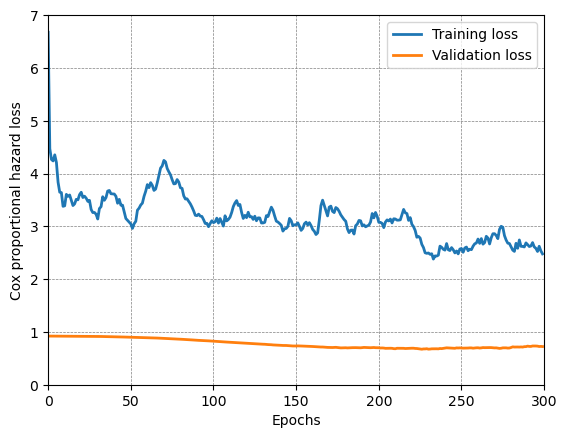

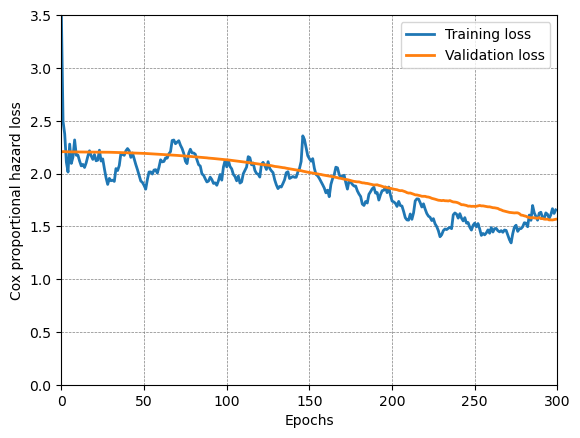

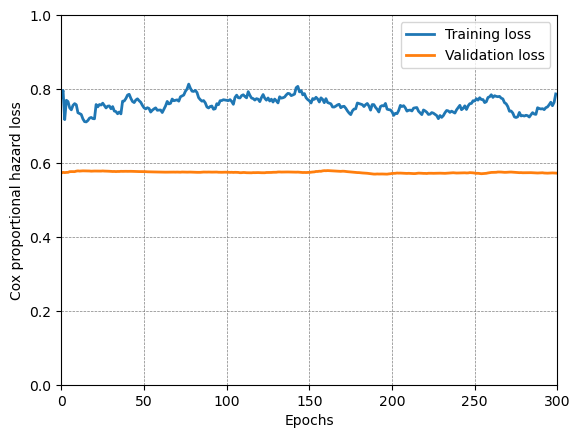

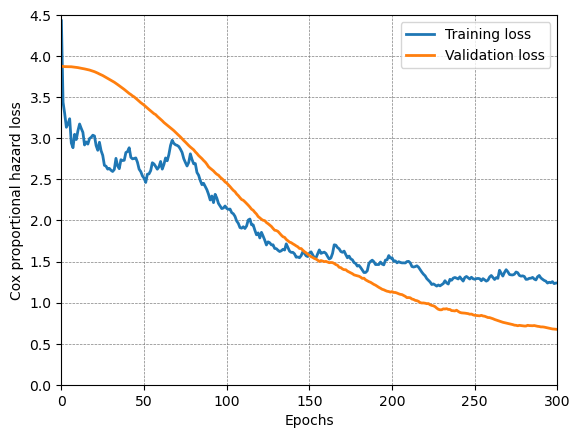

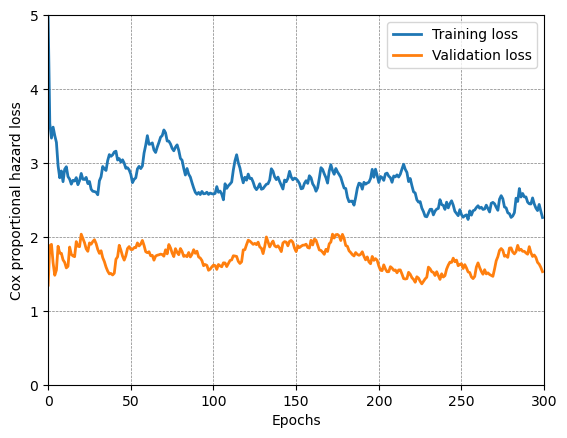

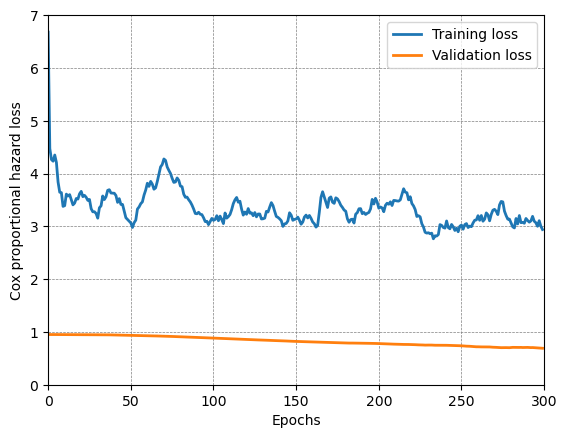

In [24]:
for run in fusion_runsb:
    df = pd.DataFrame(run.scan_history())
    if "loss/val_loss_epoch" and "loss/train_loss_epoch" in df.columns:
        val_loss = df.loc[:, "loss/val_loss_epoch"].dropna().reset_index(drop=True)
        train_loss = df.loc[:, "loss/train_loss_epoch"].dropna().reset_index(drop=True)
        loss_plot_ema(train_loss, val_loss)


## Specificity plots

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Smooth the data with a moving average
window_size = 30
# train_loss_smooth = np.convolve(train_loss, np.ones(window_size)/window_size, mode='valid')
# val_loss_smooth = np.convolve(val_loss, np.ones(window_size)/window_size, mode='valid')

def loss_plot_ema_subset(loss, run, max_val, prefix="", window_size=30):
    loss_smooth = loss.ewm(span=window_size).mean()

    # Plot the curves with different thickness
    plt.plot(loss_smooth, linewidth=2, 
    label=f'{prefix}{run.name.split("_")[-1].replace("drop", "").replace("fsz", "")}'
    )

    # Add legend and axis labels
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Cox proportional hazard loss')
    plt.xlim(0, len(loss_smooth))
    plt.ylim(0, max_val)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [10]:
fsz_runs = []
dropout_rate_runs = []
for run in successful_runs:
    if run.name.startswith("SNNet_1-e5_fsz"):
        fsz_runs.append(run)
    if run.name.startswith("SNNet_1e-5_") and run.name.endswith("drop"):
        dropout_rate_runs.append(run)


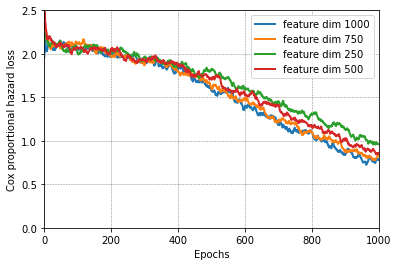

In [11]:
for run in fsz_runs:
    df = pd.DataFrame(run.scan_history())
    if "loss/val_loss_epoch" and "loss/train_loss_epoch" in df.columns:
        train_loss = df.loc[:, "loss/train_loss_epoch"].dropna().reset_index(drop=True)
        loss_plot_ema_subset(train_loss, run, max_val=2.5, prefix="feature dim ")
plt.savefig(fname=f"../assets/loss_plots/fsz_train.png", dpi=300)

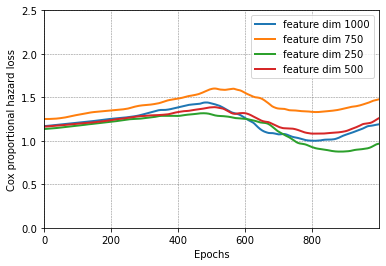

In [12]:
for run in fsz_runs:
    df = pd.DataFrame(run.scan_history())
    if "loss/val_loss_epoch" and "loss/train_loss_epoch" in df.columns:
        val_loss = df.loc[:, "loss/val_loss_epoch"].dropna().reset_index(drop=True)
        loss_plot_ema_subset(val_loss, run, max_val=2.5, prefix="feature dim ")
plt.savefig(fname=f"../assets/loss_plots/fsz_val.png", dpi=300)

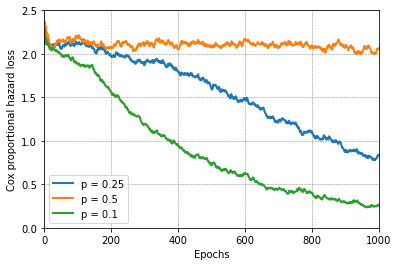

In [13]:
for run in dropout_rate_runs:
    df = pd.DataFrame(run.scan_history())
    if "loss/val_loss_epoch" and "loss/train_loss_epoch" in df.columns:
        train_loss = df.loc[:, "loss/train_loss_epoch"].dropna().reset_index(drop=True)
        loss_plot_ema_subset(train_loss, run, max_val=2.5, prefix="p = ")
plt.savefig(fname=f"../assets/loss_plots/dropout_train.png", dpi=300)

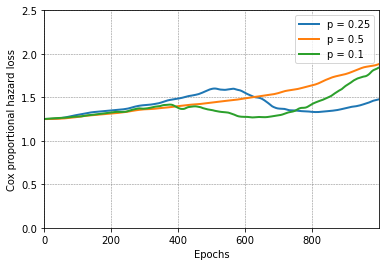

In [14]:
for run in dropout_rate_runs:
    df = pd.DataFrame(run.scan_history())
    if "loss/val_loss_epoch" and "loss/train_loss_epoch" in df.columns:
        val_loss = df.loc[:, "loss/val_loss_epoch"].dropna().reset_index(drop=True)
        loss_plot_ema_subset(val_loss, run, max_val=2.5, prefix="p = ")
plt.savefig(fname=f"../assets/loss_plots/dropout_val.png", dpi=300)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the data with a moving average
window_size = 30

def ci_plot_ema_subset(ci, run, prefix="", window_size=30):
    ci_smooth = ci.ewm(span=window_size).mean()
    # Plot the curves with different thickness
    plt.plot(ci_smooth, linewidth=2, 
    label=f'{prefix}{run.name.split("_")[-1].replace("drop", "").replace("fsz", "")}'
    )

    # Add legend and axis labels
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Concordance Index (CI)")
    plt.xlim(0, len(ci_smooth))
    plt.ylim(0, 1.0)
    plt.grid(color="gray", linestyle="--", linewidth=0.5)



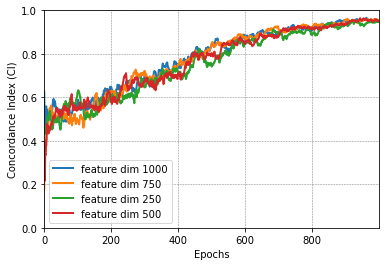

In [16]:
for run in fsz_runs:
    df = pd.DataFrame(run.scan_history())
    if (
        "performance/concordance_index_val"
        and "performance/concordance_index_train" in df.columns
    ):
        train_ci = (
            df.loc[:, "performance/concordance_index_train"]
            .dropna()
            .reset_index(drop=True)
        )
        ci_plot_ema_subset(train_ci, run, prefix="feature dim ")
plt.savefig(fname=f"../assets/ci_plots/fsz_train_ci.png", dpi=300)

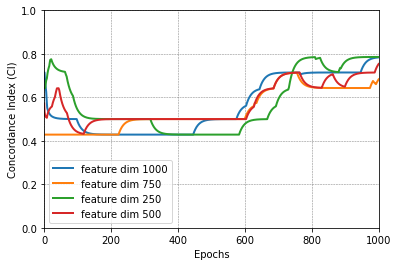

In [17]:
for run in fsz_runs:
    df = pd.DataFrame(run.scan_history())
    if (
        "performance/concordance_index_val"
        and "performance/concordance_index_train" in df.columns
    ):
        val_ci = (
            df.loc[:, "performance/concordance_index_val"]
            .dropna()
            .reset_index(drop=True)
        )
        ci_plot_ema_subset(val_ci, run, prefix="feature dim ")
plt.savefig(fname=f"../assets/ci_plots/fsz_val_ci.png", dpi=300)

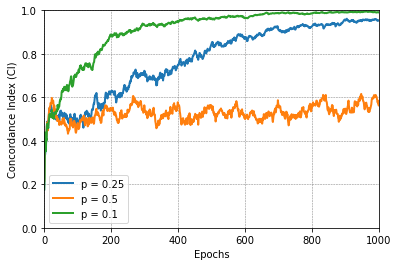

In [18]:
for run in dropout_rate_runs:
    df = pd.DataFrame(run.scan_history())
    if (
        "performance/concordance_index_val"
        and "performance/concordance_index_train" in df.columns
    ):
        train_ci = (
            df.loc[:, "performance/concordance_index_train"]
            .dropna()
            .reset_index(drop=True)
        )
        ci_plot_ema_subset(train_ci, run, prefix="p = ")
plt.savefig(fname=f"../assets/ci_plots/dropout_train_ci.png", dpi=300)

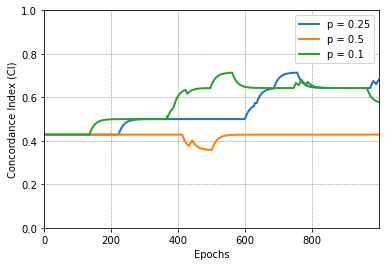

In [19]:
for run in dropout_rate_runs:
    df = pd.DataFrame(run.scan_history())
    if (
        "performance/concordance_index_val"
        and "performance/concordance_index_train" in df.columns
    ):
        val_ci = (
            df.loc[:, "performance/concordance_index_val"]
            .dropna()
            .reset_index(drop=True)
        )
        ci_plot_ema_subset(val_ci, run, prefix="p = ")
plt.savefig(fname=f"../assets/ci_plots/dropout_val_ci.png", dpi=300)